In [2]:
import sys
sys.path.insert(0, './../Libs/')
import numpy as np
from LinearClassification import Classification
from BasisFunction import BaseBasicFunction
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder

def _shuffle(X, t):
    X, t = shuffle(X, t.ravel())
    t = t.reshape(-1, 1)
    return (X, t)

def _classify(N, X, t):
    lst = []
    for _ in range(N):
        lst.append([])
    for i in range(len(t)):
        lst[t[i]].append(X[i])
    return lst

In [3]:
Nsample = 210
sampleNoise = 0.5

centers = [
    [-1.5, 3],
    [1, 4.5],
    [2, 1],
]

oneThirdSamples = int(Nsample/3)

Training cross entropy = 
0.0017911711459964953


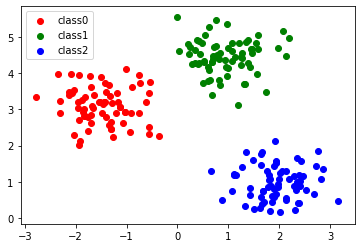

In [4]:
X, t = skdata.make_blobs(n_samples = [oneThirdSamples, oneThirdSamples, oneThirdSamples], 
                         cluster_std = sampleNoise, random_state = 0, shuffle = False, centers = centers)

plt.scatter(X[:oneThirdSamples, 0], X[:oneThirdSamples, 1], c = 'r', label = "class0")
plt.scatter(X[oneThirdSamples:oneThirdSamples*2, 0], X[oneThirdSamples:oneThirdSamples*2, 1], c = 'g', label = "class1")
plt.scatter(X[oneThirdSamples*2:, 0], X[oneThirdSamples*2:, 1], c = 'b', label = "class2")

X, t = _shuffle(X, t)

funcs = [
    lambda x: x[:, 0],
    lambda x: x[:, 1],
    lambda x: x[:, 0] * x[:, 1],
    lambda x: x[:, 0] ** 2,
    lambda x: x[:, 1] ** 2,
#     lambda x: (x[:, 0] ** 2) * x[:, 1],
#     lambda x: (x[:, 1] ** 2) * x[:, 0],
#     lambda x: x[:, 0] ** 3,
#     lambda x: x[:, 1] ** 3,
#     lambda x: (x[:, 0] ** 3) * x[:, 1],
#     lambda x: (x[:, 1] ** 3) * x[:, 0],
#     lambda x: (x[:, 0] ** 2) * (x[:, 1] ** 2),
#     lambda x: x[:, 0] ** 4,
#     lambda x: x[:, 1] ** 4,
]

Xfeatures = BaseBasicFunction(X, funcs).generate()

enc = OneHotEncoder(handle_unknown='ignore')
tfeatures = enc.fit_transform(t).toarray()
classifier = Classification(Xfeatures, tfeatures, Nepoch = 1000, eta = 0.05).fit()

plt.legend()

Cross entropy for prediction = 
2.6003890469841604


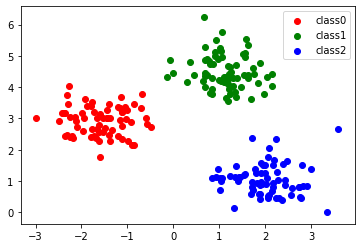

In [5]:
X, t = skdata.make_blobs(n_samples = [oneThirdSamples, oneThirdSamples, oneThirdSamples], 
                         cluster_std = sampleNoise, random_state = 100, shuffle = False, centers = centers)

plt.scatter(X[:oneThirdSamples, 0], X[:oneThirdSamples, 1], c = 'r', label = "class0")
plt.scatter(X[oneThirdSamples:oneThirdSamples*2, 0], X[oneThirdSamples:oneThirdSamples*2, 1], c = 'g', label = "class1")
plt.scatter(X[oneThirdSamples*2:, 0], X[oneThirdSamples*2:, 1], c = 'b', label = "class2")

X, t = _shuffle(X, t)

Xfeatures = BaseBasicFunction(X, funcs).generate()
tfeatures = enc.transform(t).toarray()

prediction = classifier.predict(Xfeatures, tfeatures)
plt.legend()

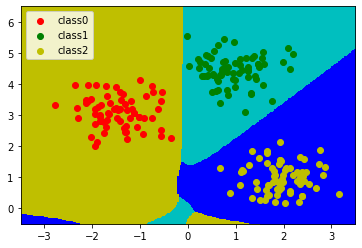

In [6]:
xlim = (-3.5, 3.5)
ylim = (-0.5, 6.5)
oneThirdSamples = int(len(t)/3)
X, t = skdata.make_blobs(n_samples = [oneThirdSamples, oneThirdSamples, oneThirdSamples], 
                         cluster_std = sampleNoise, random_state = 0, shuffle = False, centers = centers)

xplot = np.linspace(xlim[0], xlim[1], 300)
yplot = np.linspace(ylim[0], ylim[1], 300)
xgrid, ygrid = np.meshgrid(xplot, yplot)
xgrid = xgrid.reshape(-1, 1)
ygrid = ygrid.reshape(-1, 1)

xygrid = np.hstack((xgrid, ygrid))
xyFeatures = BaseBasicFunction(xygrid, funcs).generate()
prediction = classifier.predictLabel(xyFeatures).flatten().astype(int)

lst = _classify(3, xygrid, prediction)
X0 = np.array(lst[0])
X1 = np.array(lst[1])
X2 = np.array(lst[2])
plt.scatter(X0[:, 0].ravel(), X0[:, 1].ravel(), c = 'y', marker = 's', s = 5)
plt.scatter(X1[:, 0].ravel(), X1[:, 1].ravel(), c = 'c', marker = 's', s = 5)
plt.scatter(X2[:, 0].ravel(), X2[:, 1].ravel(), c = 'b', marker = 's', s = 5)

plt.scatter(X[:oneThirdSamples, 0], X[:oneThirdSamples, 1], c = 'r', label = "class0")
plt.scatter(X[oneThirdSamples:oneThirdSamples*2, 0], X[oneThirdSamples:oneThirdSamples*2, 1], c = 'g', label = "class1")
plt.scatter(X[oneThirdSamples*2:, 0], X[oneThirdSamples*2:, 1], c = 'y', label = "class2")

plt.xlim(xlim)
plt.ylim(ylim)
plt.legend()

/Users/tuantran/anaconda3/envs/p37env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tuantran/anaconda3/envs/p37env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


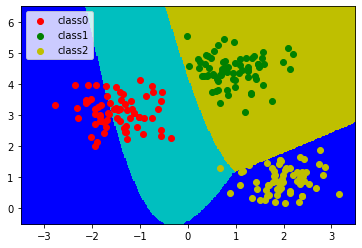

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C = 0.01).fit(Xfeatures, t)
xlim = (-3.5, 3.5)
ylim = (-0.5, 6.5)
oneThirdSamples = int(len(t)/3)
X, t = skdata.make_blobs(n_samples = [oneThirdSamples, oneThirdSamples, oneThirdSamples], 
                         cluster_std = sampleNoise, random_state = 0, shuffle = False, centers = centers)

xplot = np.linspace(xlim[0], xlim[1], 300)
yplot = np.linspace(ylim[0], ylim[1], 300)
xgrid, ygrid = np.meshgrid(xplot, yplot)
xgrid = xgrid.reshape(-1, 1)
ygrid = ygrid.reshape(-1, 1)

xygrid = np.hstack((xgrid, ygrid))
xyFeatures = BaseBasicFunction(xygrid, funcs).generate()
prediction = classifier.predict(xyFeatures).flatten().astype(int)

lst = _classify(3, xygrid, prediction)
X0 = np.array(lst[0])
X1 = np.array(lst[1])
X2 = np.array(lst[2])
plt.scatter(X0[:, 0].ravel(), X0[:, 1].ravel(), c = 'y', marker = 's', s = 5)
plt.scatter(X1[:, 0].ravel(), X1[:, 1].ravel(), c = 'c', marker = 's', s = 5)
plt.scatter(X2[:, 0].ravel(), X2[:, 1].ravel(), c = 'b', marker = 's', s = 5)

plt.scatter(X[:oneThirdSamples, 0], X[:oneThirdSamples, 1], c = 'r', label = "class0")
plt.scatter(X[oneThirdSamples:oneThirdSamples*2, 0], X[oneThirdSamples:oneThirdSamples*2, 1], c = 'g', label = "class1")
plt.scatter(X[oneThirdSamples*2:, 0], X[oneThirdSamples*2:, 1], c = 'y', label = "class2")

plt.xlim(xlim)
plt.ylim(ylim)
plt.legend()